In [5]:
import re
import string
import numpy as np 
import random
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os
import nltk
import spacy
import random
from spacy.util import compounding
from spacy.util import minibatch

import warnings
warnings.filterwarnings("ignore")

In [6]:
df_train = pd.read_csv('train_dataset.csv')

In [8]:
df_test = pd.read_csv('test_dataset.csv')

In [11]:
print(df_train.shape)
print(df_test.shape)

(3216, 35)
(804, 34)


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                3216 non-null   int64  
 1   Unnamed: 0.1              3216 non-null   int64  
 2   key                       3216 non-null   object 
 3   ID                        3216 non-null   float64
 4   create_date               3216 non-null   object 
 5   user                      3216 non-null   object 
 6   userID                    3216 non-null   float64
 7   RT_TF                     3216 non-null   bool   
 8   full_text                 3216 non-null   object 
 9   Sample.ID.x               3216 non-null   int64  
 10  Sample.ID.y               3216 non-null   int64  
 11  Still.Exists.x            3216 non-null   bool   
 12  Still.Exists.y            3216 non-null   bool   
 13  In.English.x              3216 non-null   bool   
 14  In.Engli

In [14]:
df_train.describe()

,Unnamed: 0,Unnamed: 0.1,ID,userID,Sample.ID.x,Sample.ID.y,Sentiment.Rating.x,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
count,3216.000000,3216.000000,3.216000e+03,3.216000e+03,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,3216.000000,2264.000000,2264.000000,3216.000000,3216.000000,952.000000,952.000000,3216.000000
mean,1999.877799,1999.877799,1.215330e+18,4.117402e+17,242.249378,242.249378,2.768035,2.707090,0.281405,0.204913,0.105565,0.072880,11.282649,11.077114,0.107143,0.093487,0.231032
std,1168.858979,1168.858979,6.075276e+16,5.062683e+17,144.527845,144.527845,0.637587,0.742841,0.449755,0.403701,0.307348,0.259997,3.527015,3.973351,0.309457,0.291267,0.421559
min,0.000000,0.000000,1.079900e+18,1.994321e+06,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,982.500000,982.500000,1.167218e+18,2.608568e+08,118.000000,118.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000,0.000000,0.000000,0.000000
50%,1990.000000,1990.000000,1.225400e+18,2.742042e+09,237.000000,237.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000
75%,3023.500000,3023.500000,1.266368e+18,9.545080e+17,366.250000,366.250000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000,0.000000
max,4018.000000,4018.000000,1.300530e+18,1.294950e+18,500.000000,500.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,13.000000,1.000000,1.000000,1.000000


In [18]:
df_test.describe()

,Unnamed: 0,Unnamed: 0.1,ID,userID,Sample.ID.x,Sample.ID.y,Sentiment.Rating.x,Sentiment.Rating.y,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y
count,804.000000,804.000000,8.040000e+02,8.040000e+02,804.000000,804.000000,804.000000,804.000000,804.000000,804.000000,569.000000,569.000000,804.000000,804.000000,235.000000,235.000000
mean,2047.988806,2047.988806,1.216575e+18,4.043561e+17,246.123134,246.123134,2.750000,2.705224,0.277363,0.189055,0.138840,0.073814,11.310945,11.075871,0.140426,0.089362
std,1126.943429,1126.943429,5.936689e+16,5.047332e+17,143.946064,143.946064,0.670263,0.761085,0.447976,0.391796,0.346084,0.261698,3.484580,3.948355,0.348170,0.285874
min,6.000000,6.000000,1.080500e+18,1.538300e+04,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1080.250000,1080.250000,1.178702e+18,2.680986e+08,121.000000,121.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,10.000000,13.000000,0.000000,0.000000
50%,2076.000000,2076.000000,1.227295e+18,2.502919e+09,238.500000,238.500000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000
75%,2992.750000,2992.750000,1.264225e+18,9.341920e+17,371.250000,371.250000,3.000000,3.000000,1.000000,0.000000,0.000000,0.000000,13.000000,13.000000,0.000000,0.000000
max,4019.000000,4019.000000,1.300430e+18,1.284960e+18,500.000000,500.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,13.000000,13.000000,1.000000,1.000000


In [21]:
#df_train = df_train.drop(labels='Unnamed: 0.1', axis=1)
#df_test = df_test.drop(labels='Unnamed: 0.1', axis=1)

In [25]:
df_train.head()

,Unnamed: 0,key,ID,create_date,user,userID,RT_TF,full_text,Sample.ID.x,Sample.ID.y,...,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,sample_name,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
0,2454,JewNAS,1.232290e+18,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,True,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,366,366,...,1,0,0.0,0.0,13,13,Jews2020Jan-Apr.rep2,NaN,NaN,0
1,870,JewAS,1.272910e+18,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,True,This is a perfect example of how Jews across N...,68,68,...,0,0,NaN,NaN,2,2,Jews2020May-Aug.rep1.rep1,0.0,0.0,1
2,763,JewAS,1.233040e+18,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,True,Jews were the major cotton traders &amp; had n...,49,49,...,0,0,0.0,0.0,2,2,Jews2020Jan-Apr.rep1,NaN,NaN,1
3,3744,KikesAS,1.202940e+18,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,False,🙊 I bet #randum The media's slanted view of ki...,45,45,...,1,1,0.0,0.0,0,0,kikes2019.rep1,NaN,NaN,1
4,1525,JewNAS,1.168870e+18,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,True,21 year old Palestinian woman murdered by her ...,186,186,...,0,1,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0


## Missing data in the Train Set

In [28]:
import missingno as msno

<AxesSubplot:>

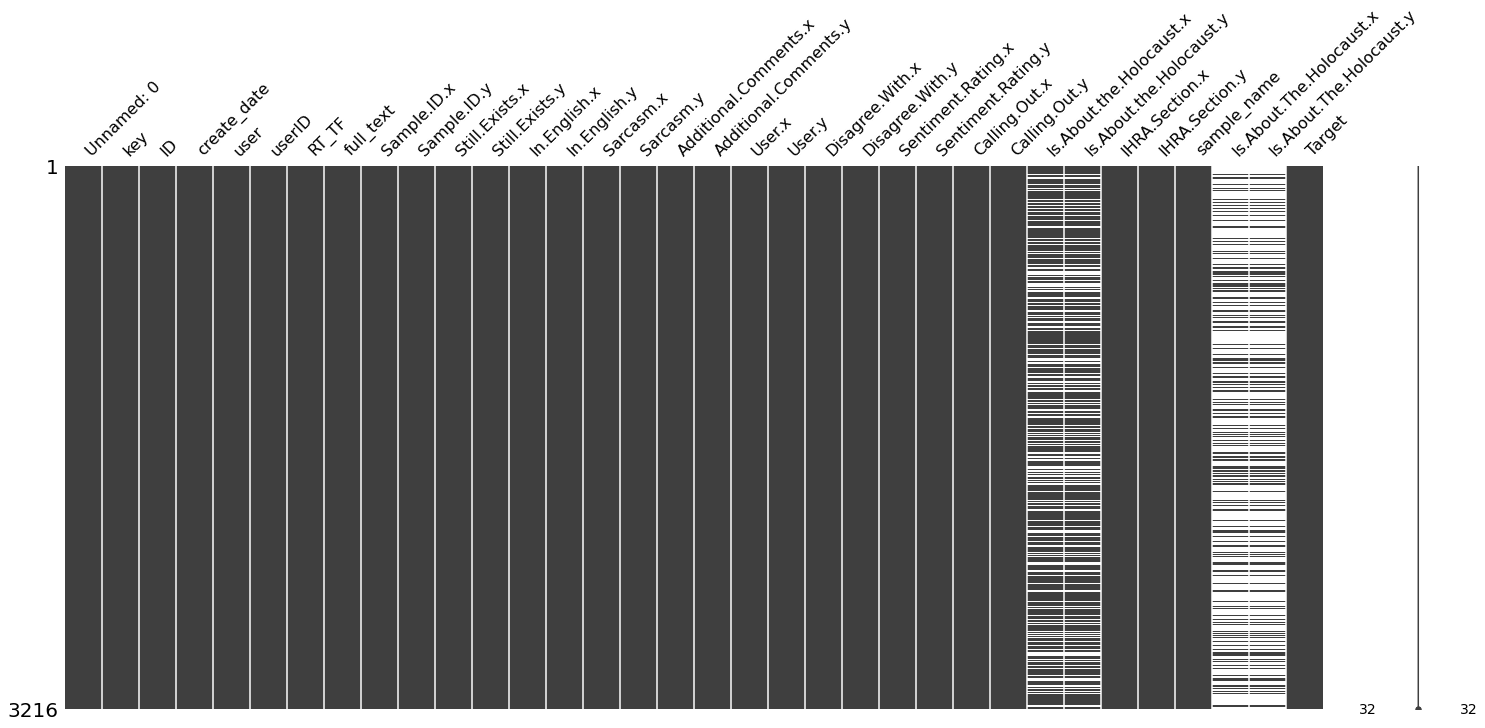

In [30]:
msno.matrix(df_train)

In [31]:
df_train.head()

,Unnamed: 0,key,ID,create_date,user,userID,RT_TF,full_text,Sample.ID.x,Sample.ID.y,...,Calling.Out.x,Calling.Out.y,Is.About.the.Holocaust.x,Is.About.the.Holocaust.y,IHRA.Section.x,IHRA.Section.y,sample_name,Is.About.The.Holocaust.x,Is.About.The.Holocaust.y,Target
0,2454,JewNAS,1.232290e+18,Tue Feb 25 07:54:26 -0500 2020,Leafy13222544,1.209270e+18,True,@ShaKeeL__007 @marksul44 @P3ng1z @BernieSander...,366,366,...,1,0,0.0,0.0,13,13,Jews2020Jan-Apr.rep2,NaN,NaN,0
1,870,JewAS,1.272910e+18,Tue Jun 16 11:13:24 -0400 2020,sharonka3,9.752547e+08,True,This is a perfect example of how Jews across N...,68,68,...,0,0,NaN,NaN,2,2,Jews2020May-Aug.rep1.rep1,0.0,0.0,1
2,763,JewAS,1.233040e+18,Thu Feb 27 09:53:39 -0500 2020,SpruceYelverton,1.114823e+09,True,Jews were the major cotton traders &amp; had n...,49,49,...,0,0,0.0,0.0,2,2,Jews2020Jan-Apr.rep1,NaN,NaN,1
3,3744,KikesAS,1.202940e+18,Fri Dec 06 08:25:54 -0500 2019,plive_calmer,8.404970e+17,False,🙊 I bet #randum The media's slanted view of ki...,45,45,...,1,1,0.0,0.0,0,0,kikes2019.rep1,NaN,NaN,1
4,1525,JewNAS,1.168870e+18,Tue Sep 03 08:53:53 -0400 2019,emzeekg,2.975341e+09,True,21 year old Palestinian woman murdered by her ...,186,186,...,0,1,0.0,0.0,13,13,Jews2019.rep2,NaN,NaN,0
